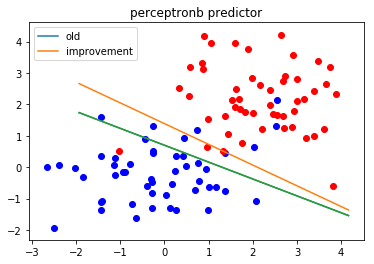

In [71]:
import numpy as np
import matplotlib.pyplot as plt
data = np.ones((100, 3))
data[:50,0], data[50:,0] = np.random.normal(0, 1, 50), np.random.normal(2, 1, 50)
data[:50,1], data[50:,1] = np.random.normal(0, 1, 50), np.random.normal(2, 1, 50)
target = np.zeros(100)
target[:50], target[50:] = -1 * np.ones(50), np.ones(50)

w = np.zeros((3,1))
w_best=np.zeros((3,1))
correct_best = 0
for j in range(10):
    for i in range(np.shape(data)[0]):
        data1= data[i].reshape(3,1)
        if target[i]*w.T@data1 > 0:
            continue
        w += target[i]*data1
        classif = data@w
        correct=0
        predict_train=[]
        for i in np.arange(np.shape(data)[0]):
            if classif[i]>=0:
                predict_train.append(1)
            else:
                predict_train.append(-1)
        for i in np.arange(np.shape(data)[0]):
            if predict_train[i] == target[i]:
                correct +=1
            else:
                continue
        if correct>correct_best:
            correct_best = correct
            #print(correct_best)
            w_best = w.copy()
        else:
            continue
x=np.arange(np.min(data[:,1]),np.max(data[:,1]),0.1)
y= -w[0]/w[1]*x-w[2]/w[1]
y_best= -w_best[0]/w_best[1]*x-w_best[2]/w_best[1]
plt.plot(x,y)
plt.plot(x,y_best)

plt.title('perceptronb predictor')
for i in range(np.shape(data)[0]):
    if target[i]>0:
        plt.scatter(data[i][0],data[i][1],c = 'r',marker = 'o')
    else:
        plt.scatter(data[i][0],data[i][1],c = 'b',marker = 'o') 
plt.plot(x,y)
plt.legend(['old','improvement'])
plt.show()